In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Sri
[nltk_data]     pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sri
[nltk_data]     pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = set()

    sent1 = [token.lower() for token in sent1 if token.lower() not in stopwords]
    sent2 = [token.lower() for token in sent2 if token.lower() not in stopwords]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)  
    vector2 = [0] * len(all_words)

    for w in sent1:
        vector1[all_words.index(w)] += 1

    for w in sent2:
        vector2[all_words.index(w)] += 1

    return 1 - nltk.cluster.util.cosine_distance(vector1, vector2)

In [4]:
def build_similarity_matrix(sentences, stopwords):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stopwords)
    return similarity_matrix

In [5]:
def visualize_similarity_matrix(similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Sentence Similarity Matrix')
    plt.xlabel('Sentences')
    plt.ylabel('Sentences')
    plt.show()

In [6]:
def visualize_sentence_similarity_graph(graph, sentences):
    plt.figure(figsize=(50, 50))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, labels={i: sent for i, sent in enumerate(sentences)}, with_labels=True, node_size=1000, font_size=12)
    plt.title("Sentence Similarity Graph")
    plt.show()

In [7]:
with open('C:/Users/Sri pavan/Desktop/BBC News Summary/News Articles/business/001.txt', 'r') as file:
    text = file.read()

In [8]:
with open('C:/Users/Sri pavan/Desktop/BBC News Summary/Summaries/business/001.txt', 'r') as ref_file:
    reference_text = ref_file.read()

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [11]:
sentence_similarity_matrix = build_similarity_matrix(tokenized_sentences, stop_words)

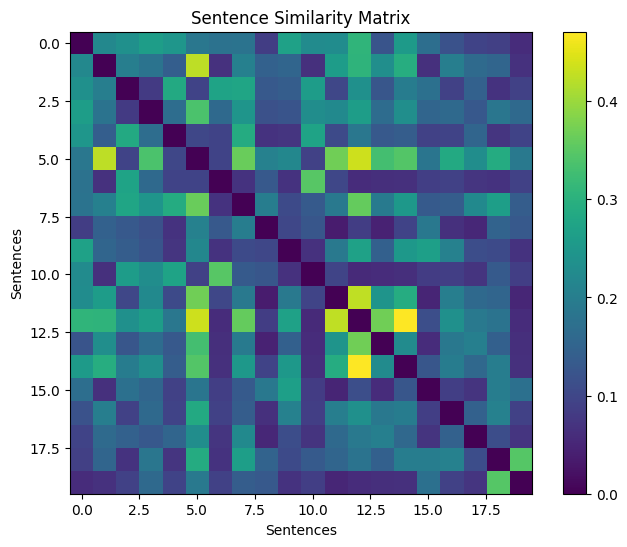

In [12]:
visualize_similarity_matrix(sentence_similarity_matrix)

In [13]:
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
scores = nx.pagerank(sentence_similarity_graph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

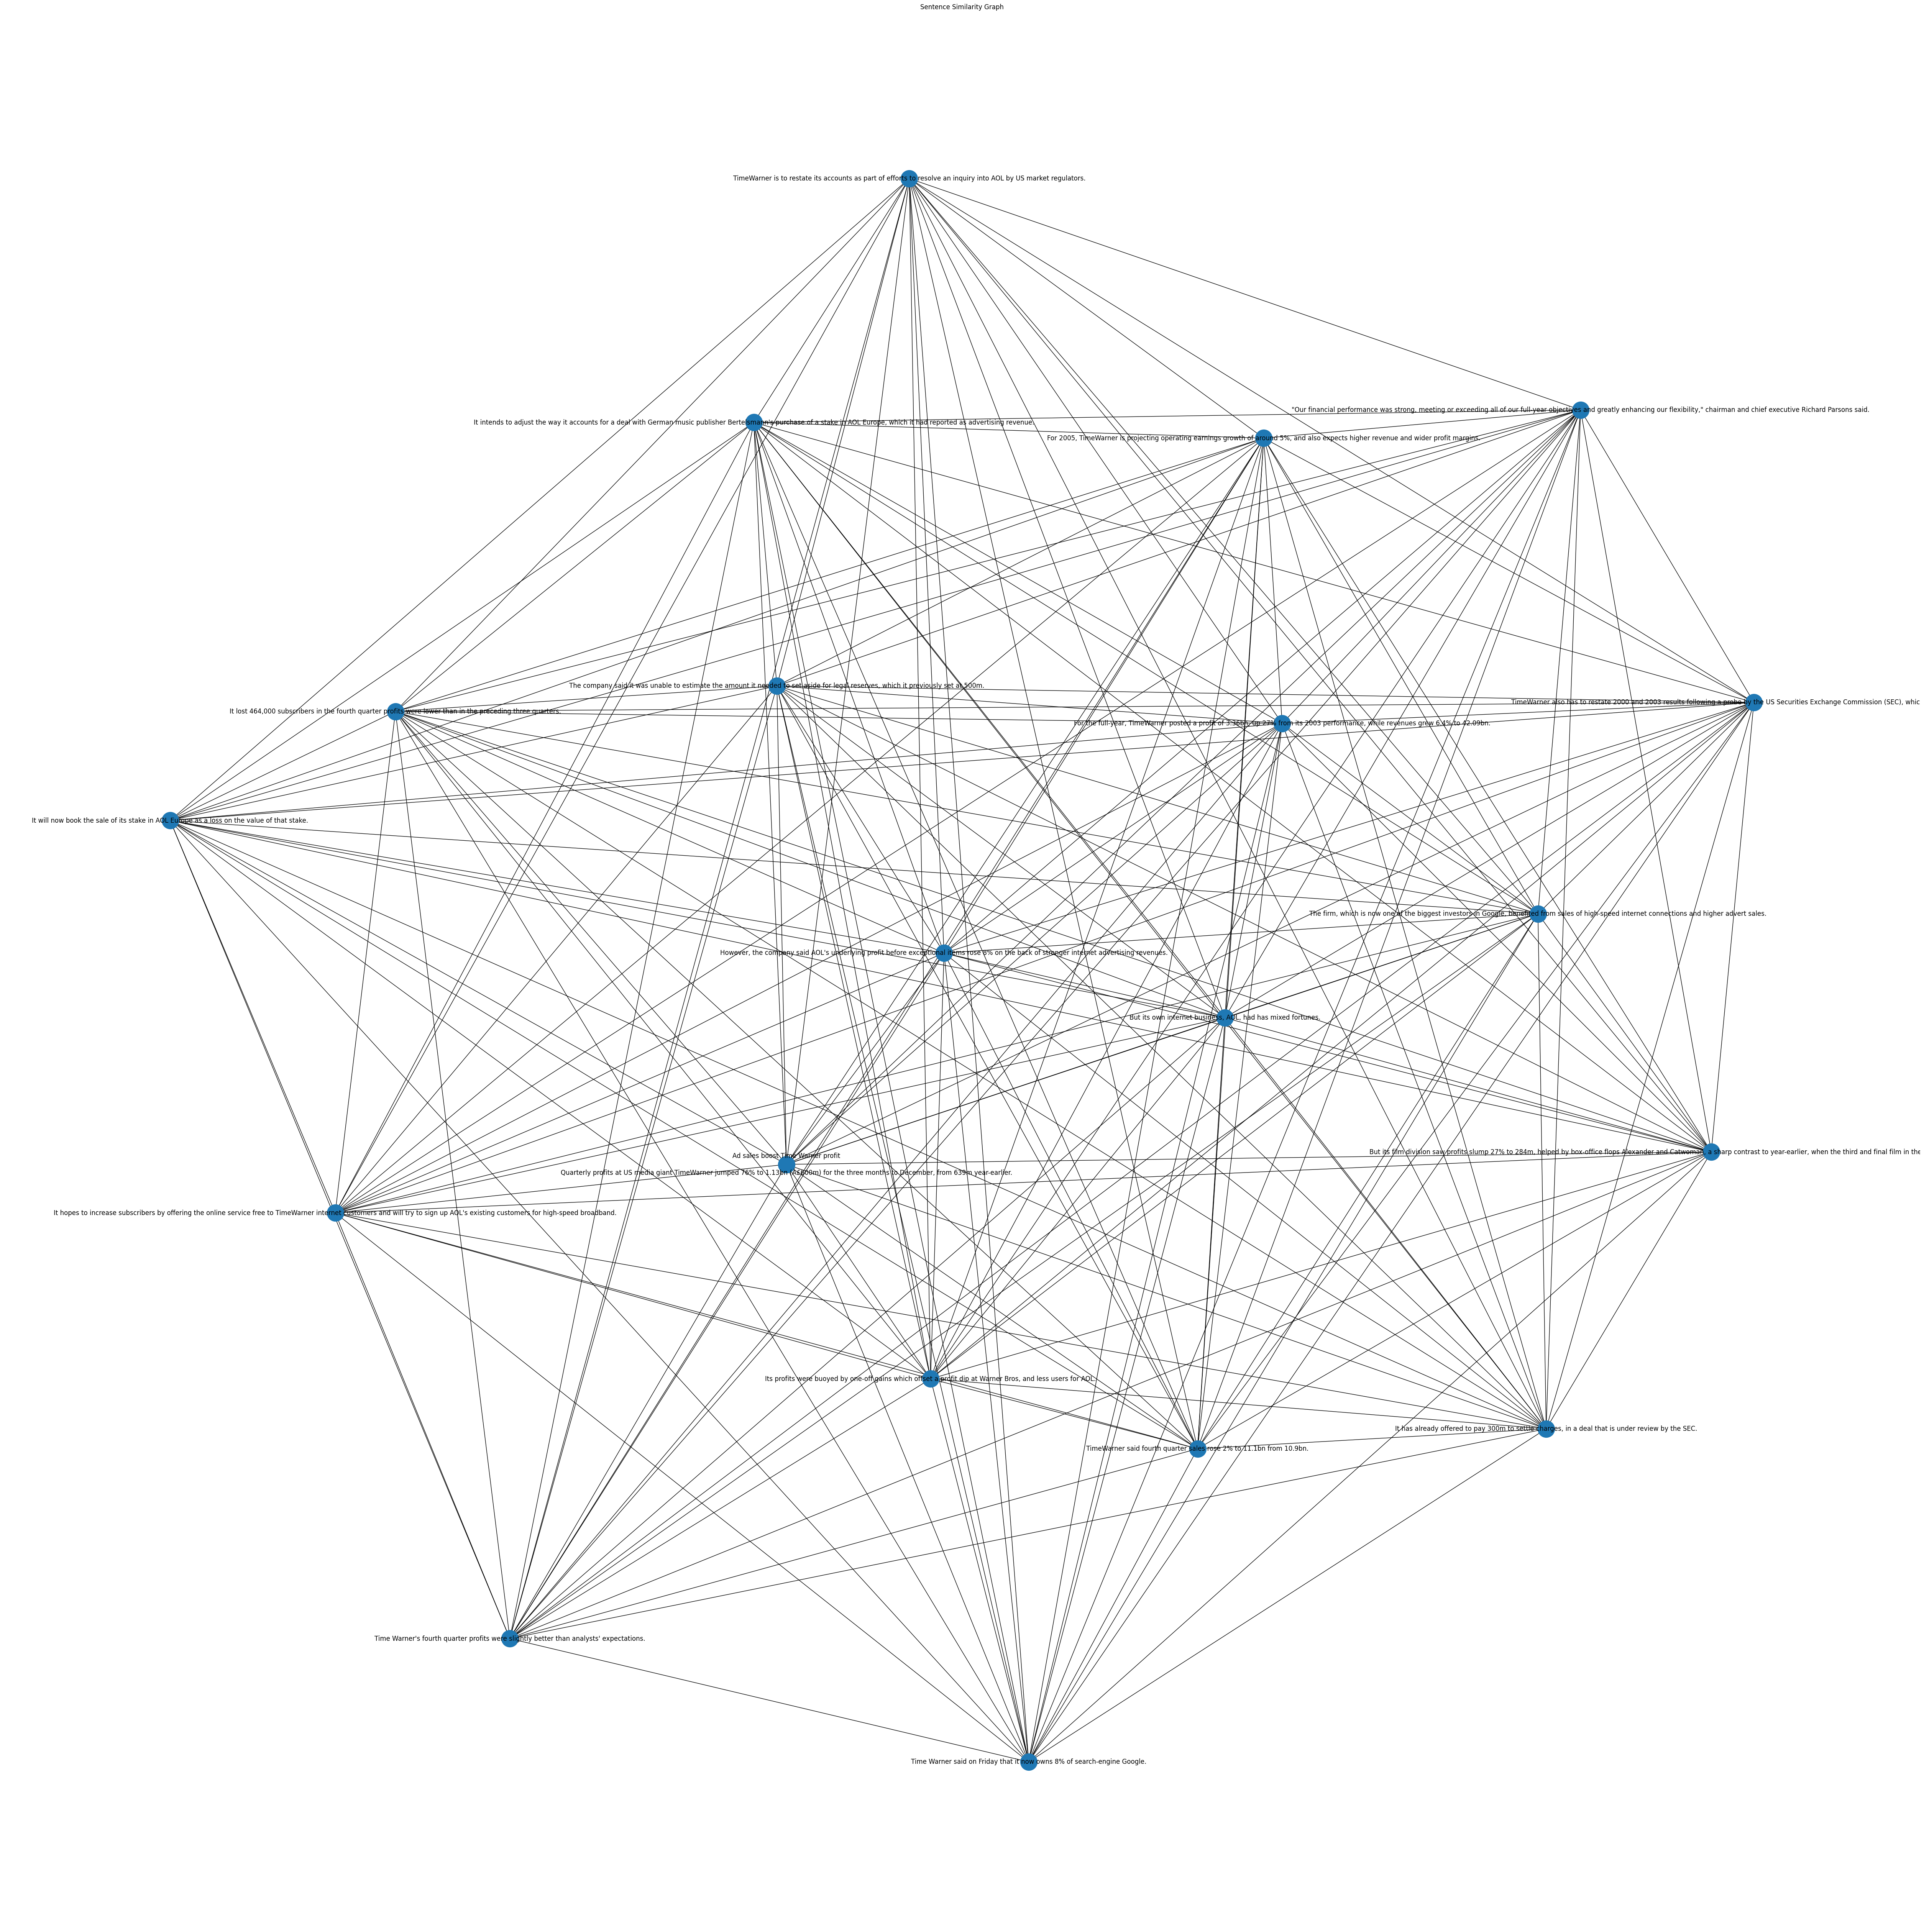

In [14]:
visualize_sentence_similarity_graph(sentence_similarity_graph, sentences)

In [15]:
print(text)

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to 1.13bn (Â£600m) for the three months to December, from 639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to 11.1bn from 10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's 

In [16]:
top_n = 5
summarize_text = [ranked_sentences[i][1] for i in range(top_n)]

In [17]:
summary = ' '.join(summarize_text)
print(summary)

But its own internet business, AOL, had has mixed fortunes. For the full-year, TimeWarner posted a profit of 3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to 42.09bn. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.


In [18]:
rouge = Rouge()
rouge_scores = rouge.get_scores(summary, reference_text)

print("ROUGE Scores:")
print(rouge_scores)

ROUGE Scores:
[{'rouge-1': {'r': 0.6388888888888888, 'p': 0.8734177215189873, 'f': 0.737967909558752}, 'rouge-2': {'r': 0.539568345323741, 'p': 0.8152173913043478, 'f': 0.6493506445576357}, 'rouge-l': {'r': 0.6388888888888888, 'p': 0.8734177215189873, 'f': 0.737967909558752}}]
